# **LOADING LIBRARIES & DATA**

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import plotly.offline as py
%matplotlib inline

#resampling library
import imblearn
from imblearn.over_sampling import SMOTE

#feature scaling library
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

#model libraries, get different metric score
from collections import Counter
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("./Dataset/train.csv")
test = pd.read_csv("./Dataset/test.csv")

# **Data Observations**

In [4]:
print(f"Dataset has {train.shape[0]} rows and {train.shape[1]} columns")
print(f"Duplicates: {train.duplicated().sum()}")
print(f"Total Missing Values: {train.isna().sum().sum()}")
print(f"Number of rows with missing values: {train.isna().any(axis=1).sum()}")
print('-------------------------------------')
print('For the test set')
print(f"\nDataset has {test.shape[0]} rows and {test.shape[1]} columns")
print(f"Duplicates: {test.duplicated().sum()}")
print(f"Total Missing Values: {test.isna().sum().sum()}")
print(f"Number of rows with missing values: {test.isna().any(axis=1).sum()}")

Dataset has 105000 rows and 18 columns
Duplicates: 0
Total Missing Values: 0
Number of rows with missing values: 0
-------------------------------------
For the test set

Dataset has 45000 rows and 17 columns
Duplicates: 0
Total Missing Values: 0
Number of rows with missing values: 0


In [5]:
# print("The train dataset contains", train.shape[0], "records, each with", train.shape[1], "attributes")
# print("The test dataset contains", test.shape[0], "records, each with", test.shape[1], "attributes")

In [6]:
train.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,37379,11000.0,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,10238,12000.0,0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,92099,6000.0,1,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,32122,15000.0,0,0,1,0.0,Sedan


In [7]:
test.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
0,352928,40-64,male,10-19y,none,working class,0.814707,1.0,after 2015,0.0,1.0,10238,10000.0,0,0,0,HatchBack
1,38579,26-39,female,20-29y,high school,upper class,0.344051,1.0,before 2015,0.0,0.0,34073,13000.0,0,0,0,Sedan
2,504022,40-64,male,10-19y,none,upper class,0.620691,0.0,after 2015,1.0,0.0,10238,12000.0,0,0,0,SUV
3,202404,26-39,male,20-29y,high school,upper class,0.689658,1.0,after 2015,1.0,1.0,10238,16000.0,1,0,0,SUV
4,527913,65+,male,10-19y,none,middle class,0.755666,0.0,after 2015,0.0,1.0,92101,14000.0,2,0,0,HatchBack


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  object 
 2   GENDER               105000 non-null  object 
 3   DRIVING_EXPERIENCE   105000 non-null  object 
 4   EDUCATION            105000 non-null  object 
 5   INCOME               105000 non-null  object 
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  float64
 8   VEHICLE_YEAR         105000 non-null  object 
 9   MARRIED              105000 non-null  float64
 10  CHILDREN             105000 non-null  float64
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  float64
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  int64  
 15  PAST_ACCIDENTS   

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   45000 non-null  int64  
 1   AGE                  45000 non-null  object 
 2   GENDER               45000 non-null  object 
 3   DRIVING_EXPERIENCE   45000 non-null  object 
 4   EDUCATION            45000 non-null  object 
 5   INCOME               45000 non-null  object 
 6   CREDIT_SCORE         45000 non-null  float64
 7   VEHICLE_OWNERSHIP    45000 non-null  float64
 8   VEHICLE_YEAR         45000 non-null  object 
 9   MARRIED              45000 non-null  float64
 10  CHILDREN             45000 non-null  float64
 11  POSTAL_CODE          45000 non-null  int64  
 12  ANNUAL_MILEAGE       45000 non-null  float64
 13  SPEEDING_VIOLATIONS  45000 non-null  int64  
 14  DUIS                 45000 non-null  int64  
 15  PAST_ACCIDENTS       45000 non-null 

In [10]:
print("Number of unique Postal Codes :",train['POSTAL_CODE'].nunique())
print("The top 10 most populous Postal Codes where most of the claims are coming from : \n",train['POSTAL_CODE'].value_counts()[:10])

Number of unique Postal Codes : 10937
The top 10 most populous Postal Codes where most of the claims are coming from : 
 10238    77608
92101     1325
92100      402
92099      155
92098      127
92097       87
92095       62
92096       62
92093       55
92094       48
Name: POSTAL_CODE, dtype: int64


**Independent variable analysis**

<AxesSubplot:xlabel='OUTCOME', ylabel='count'>

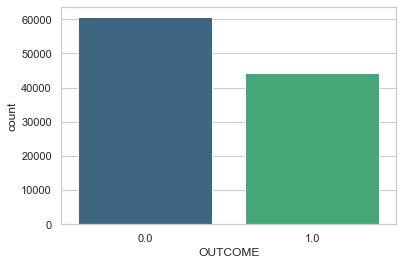

In [11]:
sns.countplot(x="OUTCOME", data=train, palette='viridis')

In [12]:
reject_claim = len(train[train['OUTCOME'] == 1])
accept_claim = len(train[train['OUTCOME'] == 0])
print("Percentage of claims accepted: {:.2f}%".format((accept_claim / len(train.OUTCOME)*100)))
print("Percentage of claims rejected: {:.2f}%".format((reject_claim / len(train.OUTCOME)*100)))

Percentage of claims accepted: 57.74%
Percentage of claims rejected: 42.26%


- The 0s and 1s are at 43% & 57&,respectively.
- The independent variable data seems fairly balanced.
- We will drop ID column. 
- Since >75% values in the Postal_Code column is 10238, we will label them as 0 and the rest as 1.

In [13]:
y = train.OUTCOME

In [14]:
data = pd.concat((train, test)).reset_index(drop=True).copy()
data = data.drop(columns=['ID', 'OUTCOME', 'POSTAL_CODE'], axis=1)

In [15]:
#train = train.drop(['ID'], axis=1)
#est = test.drop(['ID'], axis=1)

In [16]:
#data['POSTAL_CODE'] = data['POSTAL_CODE'].astype(str)
#train['POSTAL_CODE'] = train['POSTAL_CODE'].astype(str)
#test['POSTAL_CODE'] = test['POSTAL_CODE'].astype(str)

In [17]:
#data['POSTAL_CODE']=np.where(data['POSTAL_CODE']=='10238',0,1) 
#test['POSTAL_CODE']=np.where(test['POSTAL_CODE']=='10238',0,1) 

In [18]:
age_dict = { '16-25': 'teen adult',
             '26-39': 'young adult',
             '40-64': 'middle aged',
             '65+': 'senior citizens'}

drexp_dict = { '0-9y': 'novice',
               '10-19y': 'intermediate',
               '20-29y': 'expert',
               '30y+': 'veteran'}

data.AGE = data.AGE.replace(age_dict)
data.DRIVING_EXPERIENCE = data.DRIVING_EXPERIENCE.replace(drexp_dict)

#test.AGE = test.AGE.replace(age_dict)
#test.DRIVING_EXPERIENCE = test.DRIVING_EXPERIENCE.replace(drexp_dict)

**SPLITTING INTO NUMERICAL & CATEGORICAL VARIABLES**

In [19]:
data_cat = pd.DataFrame(data.select_dtypes(include="object"))
data_num = pd.DataFrame(data.select_dtypes(include=["int64", "float64"]))

#test_cat = pd.DataFrame(test.select_dtypes(include="object"))
#test_num = pd.DataFrame(test.select_dtypes(include=["int64", "float64"]))

In [20]:
data_cat.head()

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,TYPE_OF_VEHICLE
0,middle aged,female,expert,university,middle class,after 2015,Sports Car
1,young adult,male,expert,high school,middle class,before 2015,HatchBack
2,middle aged,male,expert,none,middle class,before 2015,Sedan
3,middle aged,male,expert,high school,upper class,before 2015,Sedan
4,middle aged,female,expert,none,working class,after 2015,Sedan


In [21]:
data_num.head()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,0.638050,0.0,0.0,0.0,11000.0,0,0,0
1,0.475741,1.0,1.0,0.0,9000.0,0,0,0
2,0.839817,1.0,1.0,1.0,12000.0,0,0,0
3,0.682527,1.0,0.0,1.0,6000.0,1,0,0
4,0.572184,1.0,1.0,1.0,15000.0,0,0,1


# **EXPLORATORY DATA ANALYSIS**

In [124]:
# plt.figure(figsize=(36,16))
# for i, col in enumerate(list(data_cat)):
#     plt.subplot(2,4,i+1)
#     sns.countplot(y=data_cat[col], label='data', palette="viridis", order=data_cat[col].value_counts().index)
#     plt.grid()

In [125]:
# plt.figure(figsize=(20,15))

# for i, col in enumerate(list(data_num)):
#     plt.subplot(4,3,i+1)
#     sns.histplot(data_num[col], color='g', kde=True, label='data')
#     plt.grid()
#     plt.tight_layout()

**Exploring features relationship with the Target variable**

In [113]:
# fig, axis = plt.subplots(4,2,figsize=(40,50))

# for col, ax in zip(data.select_dtypes("int64").columns.append(data.select_dtypes("float64").columns), axis.flat[:]):
#     sns.kdeplot(data=data, x=col,ax=ax, hue=y.OUTCOME, fill=True)

In [114]:
#fig, axis = plt.subplots(4,2,figsize=(40,50))

#for col, ax in zip(data.select_dtypes("object").columns, axis.flat[:]):
#    sns.countplot(data=data, x=col,ax=ax, hue="OUTCOME", fill=True)

**SOME INITIAL INSIGHTS ON FEATURES INFLUENCING THE "OUTCOME" VARIABLE**

Based on the graphs above, and deriving some from domain knowledge (insurance and from a consumer's & sales finance perspective):

- Middle Aged & Senior Citizens are more likely to have their claims accepted; this seems fair as they are more likely to be premium payers
- A High School education seems to be enough to have claims accepted; surprisingly, there are claims being accepted even without an education (None category)
- Expert (10-19y) and Novice (0-9y) categories in driving experience seem to have more acceptance and rejection of claims. 
- Upper Class income categories are more likely to have their claims accepted or rejected; seems fair as it may pertain to ability to pay the premiums.
- Vehicle Year (after or before 2015) does not seem to have much of an impact
- Except for a "sports car", all other types are fairly balanced on both acceptance/rejection of claims. A sports car is likely to incur a heavier premium, and hence the higher percentage of claims (accept or reject)
- Gender should not be playing a role, but there seem to be more acceptance & rejection for Male applicants

For the numerical features, it seems fairly straightforward:
1. For DUIS, Speeding Violations, Past Accidents - less, the better. For all 0 values, the acceptance of claims is more than rejections
2. For Annual Mileage and Credit Score - Higher, the better. For a higher Credit Score, claims acceptance is higher (since it is linked to the ability to consistently pay the premiums). Vehicles with higher mileage have a higher chance of acceptance of claims, since it can be inferred that they have not had any serious accidents and/or the driving has been fairly good.

# **Label Encoding & Feature Scaling**

In [115]:
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import OneHotEncoder, StandardScaler

#cat_pipeline = Pipeline(
#    steps=[
#        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse=False))
#    ]
#)

#num_pipeline = Pipeline(
#    steps=[
#        ("scale", StandardScaler())
#    ]
#)

In [116]:
#cat_cols = data_cat.columns
#num_cols = data_num.columns

In [117]:
#from sklearn.compose import ColumnTransformer

#cat_processor = ColumnTransformer(
#    transformers=[
#        #("numeric", num_pipeline, num_cols),
#        ("categorical", cat_pipeline, cat_cols)
#    ]
#)

#num_processor = ColumnTransformer(
#    transformers=[
#        ("numeric", num_pipeline, num_cols),
#        #("categorical", cat_pipeline, cat_cols)
#    ]
#)

**ENCODING CATEGORICAL VARIABLES**

We will encding some of the categorical features - some will be ordinal, while others will be nominal. We will derive based on the graphs above and some based on domain knowledge. 

Binary Categories:
1. Gender (m/f)

Nominal Categories (do not appear to have any relationship with one another):
1. Type of vehicle
2. Vehicle_year (before/after 2015)
3. Age

Ordinal Categories (ranking may impact the target variable):
1. Driving experience (novice to expert; novice drivers should be less likely to have their claims accepted)
2. Education (None to Univ Degree)
3. Income (ability to pay)

In [118]:
#define what to do with each category
#data_cat_bin = ['GENDER', 'VEHICLE_YEAR']
#data_cat_nom = ['AGE','DRIVING_EXPERIENCE','TYPE_OF_VEHICLE', 'INCOME']
#data_cat_ord = ['EDUCATION']

#test_cat_bin = ['GENDER']
#test_cat_nom = ['AGE','GENDER','DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'TYPE_OF_VEHICLE']
#test_cat_ord = ['DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME']

In [22]:
#Set the order of the ordinal categories for the Ordinal Encoder
#driving_exp_order = ['novice', 'intermediate', 'expert', 'veteran']
#education_order = ['none', 'high school', 'university']
#income_order = ['poverty', 'working class', 'middle class', 'upper class']

#define Encoders and encode the categorical types
#ordinal_encoder = OrdinalEncoder(categories = education_order)
#binary_encoder = OrdinalEncoder()
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Encode each categorical type
##Ordinal Categories
#data_cat_ord_enc = pd.DataFrame(ordinal_encoder.fit_transform(data_cat[data_cat_ord]))
#test_cat_ord_enc = pd.DataFrame(ordinal_encoder.fit_transform(test_cat[test_cat_ord]))

#data_cat_ord_enc.columns = data_cat[data_cat_ord].columns
#test_cat_ord_enc.columns = test_cat[test_cat_ord].columns

##Nominal Categories
data_cat = pd.DataFrame(oh_encoder.fit_transform(data_cat))
#test_cat = pd.DataFrame(oh_encoder.fit_transform(test_cat[test_cat_nom]))

#train_cat_nom_enc = pd.DataFrame(oh_encoder.fit_transform(train_cat[train_cat_nom]))
#test_cat_nom_enc = pd.DataFrame(oh_encoder.fit_transform(test_cat[test_cat_nom]))

data_cat.columns = oh_encoder.get_feature_names_out()
#test_cat.columns = oh_encoder.get_feature_names_out()

#train_cat_nom_enc.columns = oh_encoder.get_feature_names_out()
#test_cat_nom_enc.columns = oh_encoder.get_feature_names_out()

##Binary Categories
#data_cat_bin_enc = pd.DataFrame(binary_encoder.fit_transform(data_cat[data_cat_bin]))
#test_cat_bin_enc = pd.DataFrame(binary_encoder.fit_transform(test_cat[test_cat_bin]))

#data_cat_bin_enc.columns = data_cat[data_cat_bin].columns
#test_cat_bin_enc.columns = test_cat[test_cat_bin].columns

#Rejoin all the sub-DFs
#data_cat = pd.concat([data_cat_ord_enc, data_cat_nom_enc, data_cat_bin_enc], axis=1)
#test_cat = pd.concat([test_cat_ord_enc, test_cat_nom_enc, test_cat_bin_enc], axis=1)

data_cat.head()

,AGE_middle aged,AGE_senior citizens,AGE_teen adult,AGE_young adult,GENDER_female,GENDER_male,DRIVING_EXPERIENCE_expert,DRIVING_EXPERIENCE_intermediate,DRIVING_EXPERIENCE_novice,DRIVING_EXPERIENCE_veteran,...,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,TYPE_OF_VEHICLE_HatchBack,TYPE_OF_VEHICLE_SUV,TYPE_OF_VEHICLE_Sedan,TYPE_OF_VEHICLE_Sports Car
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [23]:
#train = pd.concat([train_cat, train_num], axis=1)
#test = pd.concat([test_cat, test_num], axis=1)

In [24]:
#train.shape

In [25]:
#test.shape

In [26]:
#scaler = StandardScaler()
#data_num = scaler.fit_transform(data_num)

In [27]:
data = pd.concat([data_cat, data_num], axis=1)
data.head()

,AGE_middle aged,AGE_senior citizens,AGE_teen adult,AGE_young adult,GENDER_female,GENDER_male,DRIVING_EXPERIENCE_expert,DRIVING_EXPERIENCE_intermediate,DRIVING_EXPERIENCE_novice,DRIVING_EXPERIENCE_veteran,...,TYPE_OF_VEHICLE_Sedan,TYPE_OF_VEHICLE_Sports Car,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.638050,0.0,0.0,0.0,11000.0,0,0,0
1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.475741,1.0,1.0,0.0,9000.0,0,0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.839817,1.0,1.0,1.0,12000.0,0,0,0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.682527,1.0,0.0,1.0,6000.0,1,0,0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.572184,1.0,1.0,1.0,15000.0,0,0,1


In [29]:
y.shape

(105000,)

In [30]:
data.shape

(150000, 31)

# **Feature Selection**

Now that we have encoded all the variables, we can start with feature selection before running and fitting our ML models on it.

**Dummy Variable Trap**

One of the downsides of one-hot encoding is that we can fall into the Dummy Variable Trap. To avoid problems with Multicollinearity, let's look into the one-hot encoded variables.

A common practice is to drop one of the columns for each encoding, but let's evaluate how doing so reduces multicollinearity.

One of the common ways to check for multicollinearity is the Variance Inflation Factor (VIF):

- VIF=1, Very Less Multicollinearity
- VIF<5, Moderate Multicollinearity
- VIF>5, Extreme Multicollinearity (This is what we have to avoid)


**VIF Check**

In [31]:
## Import VIF library for multi-collinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def calc_vif(dataframe):

    # calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = dataframe.columns
    vif["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif = vif.sort_values(ascending=False, by="VIF")
    return(vif)

calc_vif(data) 

,Variables,VIF
0,AGE_middle aged,inf
12,EDUCATION_university,inf
22,TYPE_OF_VEHICLE_Sports Car,inf
21,TYPE_OF_VEHICLE_Sedan,inf
20,TYPE_OF_VEHICLE_SUV,inf
19,TYPE_OF_VEHICLE_HatchBack,inf
18,VEHICLE_YEAR_before 2015,inf
17,VEHICLE_YEAR_after 2015,inf
16,INCOME_working class,inf
1,AGE_senior citizens,inf


In [32]:
data = data.drop(['AGE_middle aged','EDUCATION_university', 'TYPE_OF_VEHICLE_HatchBack', 'VEHICLE_YEAR_before 2015', 
                    'INCOME_upper class', 'EDUCATION_none', 'GENDER_female', 'DRIVING_EXPERIENCE_expert'], axis=1)
calc_vif(data)

,Variables,VIF
15,CREDIT_SCORE,12.810587
19,ANNUAL_MILEAGE,10.872451
16,VEHICLE_OWNERSHIP,5.264975
3,GENDER_male,2.569282
17,MARRIED,2.336873
14,TYPE_OF_VEHICLE_Sports Car,2.288440
18,CHILDREN,2.049715
13,TYPE_OF_VEHICLE_Sedan,2.041429
0,AGE_senior citizens,1.926056
5,DRIVING_EXPERIENCE_novice,1.834893


In [33]:
data = data.drop(['CREDIT_SCORE', 'ANNUAL_MILEAGE'], axis=1)
calc_vif(data)
#calc_vif(train.drop(("OUTCOME"), axis=1))

,Variables,VIF
15,VEHICLE_OWNERSHIP,4.399072
3,GENDER_male,2.428591
16,MARRIED,2.228454
14,TYPE_OF_VEHICLE_Sports Car,2.104467
17,CHILDREN,1.977077
13,TYPE_OF_VEHICLE_Sedan,1.892886
0,AGE_senior citizens,1.820587
5,DRIVING_EXPERIENCE_novice,1.759511
11,VEHICLE_YEAR_after 2015,1.750236
7,EDUCATION_high school,1.725212


In [44]:
#train = train.drop(['CREDIT_SCORE', 'ANNUAL_MILEAGE'], axis=1)
#calc_vif(train.drop(("OUTCOME"), axis=1))

In [45]:
# Let us call this as the base dataset
#base_df = train.copy()
#base_df.shape

In [46]:
#test = test.drop(['CREDIT_SCORE', 'ANNUAL_MILEAGE','POSTAL_CODE','AGE_middle aged','EDUCATION_university', 'TYPE_OF_VEHICLE_HatchBack', 'VEHICLE_YEAR_before 2015', 

#                    'INCOME_upper class', 'EDUCATION_none', 'GENDER_female', 'DRIVING_EXPERIENCE_expert'], axis=1)

#test.shape

**Correlation Map with Outcome variable**

In [36]:
#def plot_corr(df):
#    corr = df.corr()
#    sns.set_theme()
#    plt.figure(figsize = (22,10))
#    sns.heatmap(corr, cbar=True, annot=True, cmap='YlGnBu')
#plot_corr(base_df)


#corr_matrix = train.corr()
#fig, ax = plt.subplots(figsize=(15, 7))
#ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGn");
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5);

In [37]:
#from sklearn.preprocessing import PowerTransformer

#pt_actual = PowerTransformer()
#for c in base_df.columns[0:32]:
#    base_df[[c]] = pt_actual.fit_transform(base_df[[c]])

#base_df.head()

In [38]:
#pt_actual = PowerTransformer()
#for c in test.columns[0:32]:
#    test[[c]] = pt_actual.fit_transform(test[[c]])

#test.head()

# **MACHINE LEARNING & MODELING**

We'll select a list of popular classifiers to compare how they fare with our selected metric. The tests here will be brief without any deeper optimisation.

In [39]:
# Create feature and target variable dataframes to run through SelectKbest library and select the top features

#X = train.drop('OUTCOME',axis=1)
#y = train['OUTCOME']

In [40]:
train = data[:len(train)]
test = data[len(train):]

In [41]:
train.shape

(105000, 21)

In [43]:
y.shape

(105000,)

In [42]:
test.shape

(45000, 21)

In [134]:
train.head()

,AGE_senior citizens,AGE_teen adult,AGE_young adult,GENDER_male,DRIVING_EXPERIENCE_intermediate,DRIVING_EXPERIENCE_novice,DRIVING_EXPERIENCE_veteran,EDUCATION_high school,INCOME_middle class,INCOME_poverty,...,VEHICLE_YEAR_after 2015,TYPE_OF_VEHICLE_SUV,TYPE_OF_VEHICLE_Sedan,TYPE_OF_VEHICLE_Sports Car,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0,0,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0,0,1


In [135]:
test.head()

,AGE_senior citizens,AGE_teen adult,AGE_young adult,GENDER_male,DRIVING_EXPERIENCE_intermediate,DRIVING_EXPERIENCE_novice,DRIVING_EXPERIENCE_veteran,EDUCATION_high school,INCOME_middle class,INCOME_poverty,...,VEHICLE_YEAR_after 2015,TYPE_OF_VEHICLE_SUV,TYPE_OF_VEHICLE_Sedan,TYPE_OF_VEHICLE_Sports Car,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
105000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0
105001,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0
105002,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0
105003,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1,0,0
105004,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0,0


In [44]:
#apply SelectKBest to extract top 8 best features for housing df
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(train,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 5best features

                           Features     Score
4   DRIVING_EXPERIENCE_intermediate  9.316257
3                       GENDER_male  5.425868
14       TYPE_OF_VEHICLE_Sports Car  4.132718
12              TYPE_OF_VEHICLE_SUV  4.044384
13            TYPE_OF_VEHICLE_Sedan  2.533567
20                   PAST_ACCIDENTS  2.064729
5         DRIVING_EXPERIENCE_novice  1.616550
16                          MARRIED  1.586466


In [52]:
# from sklearn.preprocessing import PowerTransformer

# pt_actual = PowerTransformer()
# for c in train.columns[0:32]:
#     train[[c]] = pt_actual.fit_transform(train[[c]])

# for c in test.columns[0:32]:
#     test[[c]] = pt_actual.fit_transform(test[[c]])

# # train.head()

In [136]:
calc_vif(train)

,Variables,VIF
15,VEHICLE_OWNERSHIP,4.413653
3,GENDER_male,2.427676
16,MARRIED,2.234758
14,TYPE_OF_VEHICLE_Sports Car,2.107377
17,CHILDREN,1.974553
13,TYPE_OF_VEHICLE_Sedan,1.895482
0,AGE_senior citizens,1.816817
5,DRIVING_EXPERIENCE_novice,1.760023
11,VEHICLE_YEAR_after 2015,1.749336
7,EDUCATION_high school,1.725254


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.33, random_state=42)

In [55]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# test_data = scaler.transform(test)

In [65]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_y_prob = lgb_model.predict_proba(X_val)
lgb_y_pred = lgb_model.predict(X_val)
lgb_logloss_score = log_loss(y_val, lgb_y_prob)
lgb_acc_score = accuracy_score(y_val, lgb_y_pred)

print(lgb_logloss_score)
print(lgb_acc_score)

0.6830024586049599
0.575036075036075


In [69]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
log_y_prob = log_clf.predict_proba(X_val)
log_y_pred = log_clf.predict(X_val)
log_logloss_score = log_loss(y_val, log_y_prob)
log_acc_score = accuracy_score(y_val, log_y_pred)

print(log_logloss_score)
print(log_acc_score)

0.6816094220602654
0.576046176046176


In [72]:
log_test_pred = log_clf.predict(test)

In [73]:
log_test_pred = log_clf.predict_proba(test)
pd.DataFrame(log_test_pred[:,1]).describe()

,0
count,45000.000000
mean,0.422132
std,0.013653
min,0.372917
25%,0.412285
50%,0.422020
75%,0.431506
max,0.466710


In [80]:
submission_log = pd.read_csv("./Submission/submission_sample.csv")
submission_log['OUTCOME'] = log_test_pred
submission_log['OUTCOME'].head()

0    0.584880
1    0.554938
2    0.605663
3    0.589578
4    0.584133
Name: OUTCOME, dtype: float64

In [76]:
lgb_clf = lgb.LGBMClassifier(learning_rate=0.01, n_estimators=1000, random_state=42,objective='binary', metric='binary_logloss',)

In [77]:
lgb_clf.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=500)
pred=lgb_clf.predict_proba(test, num_iteration=lgb_clf.best_iteration_)[:,1]

#pred_clipped = np.clip(pred, 0.025, 0.975)

[1]	valid_0's binary_logloss: 0.681539
Training until validation scores don't improve for 500 rounds
[2]	valid_0's binary_logloss: 0.681533
[3]	valid_0's binary_logloss: 0.681529
[4]	valid_0's binary_logloss: 0.681524
[5]	valid_0's binary_logloss: 0.681522
[6]	valid_0's binary_logloss: 0.681518
[7]	valid_0's binary_logloss: 0.681516
[8]	valid_0's binary_logloss: 0.681514
[9]	valid_0's binary_logloss: 0.681512
[10]	valid_0's binary_logloss: 0.68151
[11]	valid_0's binary_logloss: 0.681509
[12]	valid_0's binary_logloss: 0.681506
[13]	valid_0's binary_logloss: 0.681506
[14]	valid_0's binary_logloss: 0.681502
[15]	valid_0's binary_logloss: 0.681502
[16]	valid_0's binary_logloss: 0.6815
[17]	valid_0's binary_logloss: 0.681502
[18]	valid_0's binary_logloss: 0.681498
[19]	valid_0's binary_logloss: 0.6815
[20]	valid_0's binary_logloss: 0.681497
[21]	valid_0's binary_logloss: 0.6815
[22]	valid_0's binary_logloss: 0.681501
[23]	valid_0's binary_logloss: 0.681503
[24]	valid_0's binary_logloss: 0.6

In [78]:
submission_lgb = pd.read_csv("./Submission/submission_sample.csv")
submission_lgb['OUTCOME'] = pred
submission_lgb.head()

,OUTCOME
0,0.421994
1,0.424605
2,0.416521
3,0.416521
4,0.420651


In [81]:
submission_lgb.to_csv("./Submission/lgb_submission.csv", index=False)

In [85]:
lgb_clf_1.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=500)

pred_1=lgb_clf_1.predict_proba(test, num_iteration=lgb_clf_1.best_iteration_)[:,1]

[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set with min_data=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[1]	valid_0's binary_logloss: 0.681543
Training until validation scores don't improve for 500 rounds
[2]	valid_0's binary_logloss: 0.681542
[3]	valid_0's binary_logloss: 0.681541
[4]	valid_0's binary_logloss: 0.68154
[5]	valid_0's binary_logloss: 0.68154
[6]	valid_0's binary_logloss: 0.681539
[7]	valid_0's binary_logloss: 0.681539
[8]	valid_0's binary_logloss: 0.681538
[9]	valid_0's binary_logloss: 0.681537
[10]	valid_0's binary_logloss: 0.681536
[11]	valid_0's binary_logloss: 0.681535
[12]	valid_0's binary_logloss: 0.681534
[13]	valid_0's binary_logloss: 0.681533
[14]	valid_0's binary_logloss: 0.681533
[15]	valid_0's binary_logloss: 0.681533
[16]	valid_0's binary_logloss: 0.681532
[17]	valid_0's binary_logloss: 0

In [86]:
submission_lgb_1 = pd.read_csv("./Submission/submission_sample.csv")
submission_lgb_1['OUTCOME'] = pred_1
submission_lgb_1.head()

,OUTCOME
0,0.417185
1,0.430358
2,0.411778
3,0.414855
4,0.415727


In [87]:
submission_lgb_1.to_csv("./Submission/lgb_submission_1.csv")